In [ ]:
# Generate a sysnthetic dataset of marine ecological dataset to contain
# '''
#20 marine zones (Z1 to Z20)
# 6 ecological policies
# Binary values (0 or 1) indicating policy presence, randomly assigned using a bionomial distribution
# '''

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [ ]:
# Generate dataset

np.random.seed(42)  # for reproducibility
num_zones = 20
policies = [
    "coral_protection",
    "fishing_ban",
    "turtle_nesting",
    "oil_drilling_ban",
    "marine_sanctuary",
    "mangrove_protection"
]

In [ ]:
# Each policy is designed to have a 50% chance of being applied to a zone

data_matrix = np.random.binomial(1, 0.5, size=(num_zones, len(policies)))
zone_ids = [f"Z{i+1}" for i in range(num_zones)]

In [4]:
# Create DataFrame
df = pd.DataFrame(data_matrix, columns=policies, index=zone_ids)
df.index.name = "Zone_ID"

In [5]:
df

,coral_protection,fishing_ban,turtle_nesting,oil_drilling_ban,marine_sanctuary,mangrove_protection
Zone_ID,,,,,,
Z1,0,1,1,1,0,0
Z2,0,1,1,1,0,1
Z3,1,0,0,0,0,1
Z4,0,0,1,0,0,0
Z5,0,1,0,1,1,0
Z6,1,0,0,1,1,1
Z7,0,0,1,0,0,0
Z8,0,1,0,1,0,1
Z9,1,0,1,1,1,1


In [ ]:
# Save data to CSV
df.to_csv("generated_marine_zones.csv")

In [8]:
# Step 2: Clustering analysis
# ---------------------------
# Compute Jaccard distance
jaccard_dist = pdist(df, metric="jaccard")

In [9]:
# Perform hierarchical clustering using complete linkage
linked = linkage(jaccard_dist, method="complete")

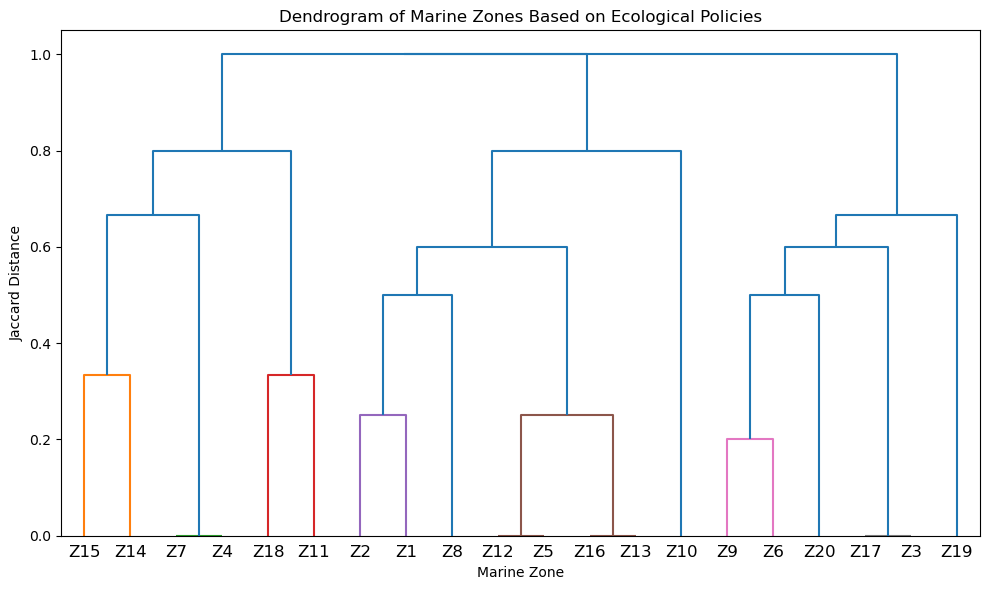

In [10]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=df.index.tolist(),
           distance_sort="descending",
           color_threshold=0.5)
plt.title("Dendrogram of Marine Zones Based on Ecological Policies")
plt.xlabel("Marine Zone")
plt.ylabel("Jaccard Distance")
plt.tight_layout()
plt.savefig("dendrogram_marine_zones.png")
plt.show()

In [11]:
# Optional: Assign cluster labels
cluster_labels = fcluster(linked, t=0.5, criterion='distance')
df["Cluster"] = cluster_labels

In [12]:
# Save final clustered data
df.to_csv("clustered_marine_zones.csv")